# Final Exam
### YourUserID: 250896733

## General
The instructions for the final exam are included in the cover page share on OWL. In addion, some basic rules:

* You **are allowed** to use any document and source on your computer and look up documents on the internet.
* You or **not allowed** to share documents, or communicate in any other way with people about the final during the final. Afterwards, you are not allowed to share the final, or talk about its content, with students who still have to take a make-up final  
* Most questions also require a written answer. The answer to these questions should be given in full English sentences.
* All Figures should have a x- and y-axis label.
* The Final exam needs to be submitted on OWL  before the deadline. If you have accomodation officially approved by student counseling, you may have extra time.  

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!



## Data set 
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk. 

### Source
The dataset (framingham.csv) is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient went on to develop coronary heart disease (CHD) in a 10 year period. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

* male: Indicator variable for biological sex (1:male 0:female)
* age: Age of the patient in years 
* education: Education level. Ordinal variable.c
* currentSmoker: whether or not the patient is a current smoker (1:yes 0:no)
* cigsPerDay: the number of cigarettes that the person smoked on average in one day
* BPMeds: whether or not the patient was on blood pressure medication (1:yes 0:no)
* prevalentStroke: whether or not the patient had previously had a stroke 
* prevalentHyp: whether or not the patient was hypertensive
* diabetes: whether or not the patient had diabetes
* totChol: total cholesterol level
* sysBP: systolic blood pressure
* diaBP: diastolic blood pressure
* BMI: Body Mass Index
* heartRate: heart rate (beats per minute)
* glucose: glucose level
* TenYearCHD: 10 year risk of coronary heart disease (1: developed signs of CHD in 10 year period, 0: did not develop CHD) 

In [1]:
## perform the necessary imports

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy.stats import t
#from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, f1_score, log_loss
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import torch
from torch import nn 
import torch.nn.functional as functional
import matplotlib.pyplot as plt 




## Task 1: Logistic regression (29pts)
### Question 1 (2pt)
Load the Data set framingham.csv *discarding all rows in the data frame that include any NaNs*. 

Split the data into equals-sized training and test sets (using a random_state = 0). 

How many observations do you have in your training set?

In [2]:
data = pd.read_csv('framingham.csv')

data = data.dropna()
data.head()

data2 = data
X = data.drop('TenYearCHD', axis = 'columns').values
Features = data.drop('TenYearCHD', axis = 'columns')
y = data.TenYearCHD.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 0.5,
                                                random_state = 0)

print(Xtrain.size, Xtest.size)
print(data.columns)

print("The train set has ", Xtrain.size, " observations" )


27420 27420
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
The train set has  27420  observations


### Question 2  (6pts)
What is the baseline rate (mean) of the 10-year risk of CHD in the test sample? 

What is the baseline performance for the following evaluation criteria - i.e. the expected test performance of a classifier that always predicts 0? 

* Accuracy
* F1-score
* Specificity 
* Sensitivity
* Balanced accuracy

In [3]:
mean = np.mean(y)
print("The baseline mean is ", mean)

def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    fscore = (2*recall*precision)/recall+precision
    balanced = (sensitivity+specificity)/2
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    
    print("F1 score:",round(fscore,3),"Balanced accuracy:",round(balanced,3))

## Put code here to compute criteria:
    
ytest_hat = np.zeros(y.size)
compute_performance(ytest_hat, y, [0,1])

The baseline mean is  0.15235229759299782
tp: 0 tn: 3099 fp: 0 fn: 557
Accuracy: 0.848 Recall: 0.0 Precision: nan Sensitivity: 0.0 Specificity: 1.0
F1 score: nan Balanced accuracy: 0.5


<ipython-input-3-7e300c8379ea>:18: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


### Question 3 (8pts)
Using the training data, build a Logisitic regression model (without regularization) based on the demographic variables (male, age, education) only. Using 10-fold cross-validation on the training set, report the performance of this model using a suitable evaluation (scoring) criterion. 
<br>__Written answer__: Justify your choice of evaluation criterion. Mention at least 2 other evaluation criteria and explain why these are not suitable, or not as good. 

In [4]:
# model 1 - linear regression
#Since this is a classification quesiton, we can use evaluation criterion from above. Since we mostly care about identifying the correct positive classes, we can use
#fscore. Fscore is great for information retrieval in cases like this when the positive class is rare, but the most important diagnoses. Baseline accuracy is 85%, and not
#a good measure since most classes will be negative. The difference between identifying a false positive vs a false negative is key here, which baseline accruacy does not
#capture. We could also use balanced accuracy, but it is more adept to cases when the positive classes are more frequent and need to be balanced with the distribution.
#The balanced accuracy metric gives half its weight to how many positives you labeled correctly and how many negatives you labeled correctly.

# cv_score = cross_val_score(modellr, demoXtrain, demoytrain, cv=10, scoring=make_scorer(f1_score))
# print('CV Score Mean: ', cv_score.mean())
# print('All CV Scores: ', cv_score)
# print('Base Model CV Score: ', modellr.score(demoXtrain, demoytrain))


md1 = LogisticRegression(penalty='none', max_iter = 10000)

X2 = data2.drop(['currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD'], axis = 'columns').values
y2 = data2.TenYearCHD.values

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2,
                                                y2, 
                                                test_size = 0.5,
                                                random_state = 0)

modellr = md1.fit(Xtrain2, ytrain2)

# Cross validate f1 score directly
simple_cv = cross_val_score(modellr, 
                            Xtrain2, 
                            ytrain2, 
                            cv = 10, 
                            scoring=make_scorer(f1_score))


print('CV Score:', simple_cv.mean())
print('CV scores: ', simple_cv)

print(md1.score(Xtrain2, ytrain2))

CV Score: 0.0
CV scores:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.8539387308533917


### Question 4 (6pts)
By dropping one variable at a time from the model from Question 3, determine which of the 3 variables is the most crucial variable in the predictive model. Which variable could most likely be excluded? 

In [5]:
#drop age and get cv score
X2 = data2.drop(['age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD'], axis = 'columns').values
y2 = data2.TenYearCHD.values

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2,
                                                y2, 
                                                test_size = 0.5,
                                                random_state = 0)

md1.fit(Xtrain2, ytrain2)

# Cross validate f1 score directly
simple_cv = cross_val_score(modellr, 
                            Xtrain2, 
                            ytrain2, 
                            cv = 10, 
                            scoring=make_scorer(f1_score))


print('CV Score after dropping age:', simple_cv.mean())
print('CV scores: ', simple_cv)

print(md1.score(Xtrain2, ytrain2))


#drop education and get cv score
X2 = data2.drop(['education','currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD'], axis = 'columns').values
print(X2)
y2 = data2.TenYearCHD.values

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2,
                                                y2, 
                                                test_size = 0.5,
                                                random_state = 0)

md1.fit(Xtrain2, ytrain2)

# Cross validate f1 score directly
simple_cv = cross_val_score(modellr, 
                            Xtrain2, 
                            ytrain2, 
                            cv = 10, 
                            scoring=make_scorer(f1_score))


print('CV Score after dropping education:', simple_cv.mean())
print('CV scores: ', simple_cv)

print(md1.score(Xtrain2, ytrain2))


#drop sex and get cv score
X2 = data2.drop(['male','currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD'], axis = 'columns').values
print(X2)
y2 = data2.TenYearCHD.values

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2,
                                                y2, 
                                                test_size = 0.5,
                                                random_state = 0)

md1.fit(Xtrain2, ytrain2)

# Cross validate f1 score directly
simple_cv = cross_val_score(modellr, 
                            Xtrain2, 
                            ytrain2, 
                            cv = 10, 
                            scoring=make_scorer(f1_score))


print('CV Score after dropping education:', simple_cv.mean())
print('CV scores: ', simple_cv)

print(md1.score(Xtrain2, ytrain2))

##We can see that the CV score is highest when male is dropped, meaning it is the most crucial. The CV score is lowest when education is dropped, meaning
##it probably doesn't have much impact and can be excluded.

CV Score after dropping age: 0.0
CV scores:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.8539387308533917
[[ 1 39]
 [ 0 46]
 [ 1 48]
 ...
 [ 1 50]
 [ 1 51]
 [ 0 52]]
CV Score after dropping education: 0.0
CV scores:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.8539387308533917
[[39.  4.]
 [46.  2.]
 [48.  1.]
 ...
 [50.  1.]
 [51.  3.]
 [52.  2.]]
CV Score after dropping education: 0.0
CV scores:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.8539387308533917


### Question 5 (7pts)
Combine all variables (except the one you want to predict!) into a Logistic regression model without regularization. Using the training set only, determine the average cross-validated log likelihood of the model on the training data, using 10-fold crossvalidation. 

__Hint__: The log-likelihood for a single observation $y$ and a predicted probability $\hat{y}$ is 
$ log P(y|\hat{y})= y log(\hat{y}) + (1-y) log(1-\hat{y})$. There is a sklearn scoring method that calculates this quantity:
https://scikit-learn.org/stable/modules/model_evaluation.html

In [6]:
modellr2 = md1.fit(Xtrain, ytrain)

# Cross validate f1 score directly
simple_cv = cross_val_score(modellr2, 
                            Xtrain2, 
                            ytrain2, 
                            cv = 10, 
                            scoring=make_scorer(log_loss))


print('CV Score:', simple_cv.mean())
print('CV scores: ', simple_cv)

print(md1.score(Xtrain, ytrain))

CV Score: 5.044656567906158
CV scores:  [4.90714856 5.09588504 5.09588504 5.09588504 5.09588504 5.09588504
 5.09588504 5.09588504 4.93411091 4.93411091]
0.8577680525164114


## Task 2: Regularized Logisitic regression model (27pts) 

### Question 1 (8pts)
Use L1 regularization to determine the best set of variables to include in a predictive model.
Add a penalty of $\lambda \sum_{i}{|\beta_i|_1}$ ($\beta_i$ are your regression coefficients) to the Logistic regression model. Vary the regularization parameter $\lambda$ between 0.2 and 200, evenly spaced in log-space. 

Apply all necessary preprocessing steps to your variables to be able to compare meanfully  between different predictors in the model. 

Plot the coefficient path, i.e., the size of the regression coefficients relative to the size of the the regularization paramter. 
<br>__Written Answer :__ Which two variables are the two most important predictors of 10-year risk of CHD?   

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate'],
      dtype='object')


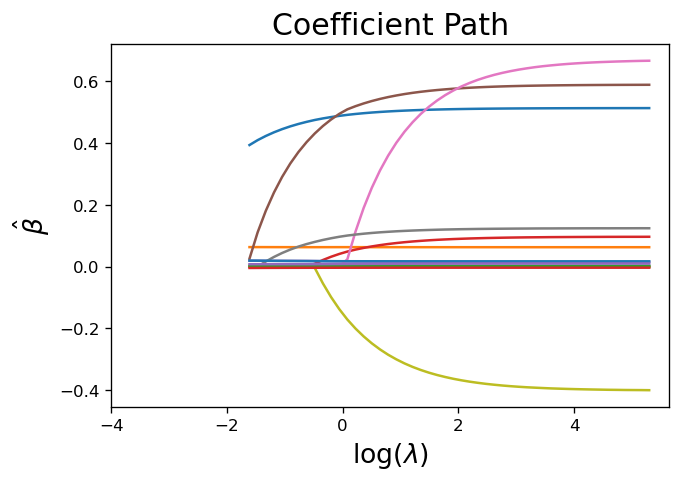

In [7]:
regularization_strength = np.exp(np.linspace(np.log(0.2),np.log(200),50))
    
# cs = l1_min_c(Xtrain, ytrain, loss='log') * np.logspace(0, 7, 16)
clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
for i in (regularization_strength):
    clf.set_params(C=i)
    clf.fit(Xtrain, ytrain)
    coefs_.append(clf.coef_.ravel().copy())

fig, ax = plt.subplots(dpi = 120)
ax.plot(np.log(regularization_strength), coefs_)
ax.set_xlabel(r'$\log(\lambda)$', fontsize = 16)
ax.set_ylabel(r'$\hat{\beta}$', fontsize = 16)
ax.set_title('Coefficient Path', fontsize = 18)
ax.set_xlim(-4,None)


print(Features.columns[:-1])
# for i in (Features.columns[:-1]):
#     #ytemp = coefs_[i,0]
#     ax.annotate(i, xy = (-3, coefs_[0,i]), ha = 'left', fontsize = 8)


#########
#The two most important features in this data set are represented by the highest magnitute of Beta. In this case, its the pink and brown line. By printing the coefs 
#we can see this is features (print((coefs_[99]))) X6 and X7, or BPMeds and prevalentStroke

### Question 2 (7pts)
Using the same model and the range of regularisation parameters as in T2, Q1, determine the 10-fold crossvalidated performance for different values of the L1-regularisation parameter. Use the cross-validated log-likelihood of the data under the model as evaluation criterion. (If you couldn't calulcate the log-likelihood in Task 1, Question 5, use another suitable evaluation criterion).   

Make a plot of the crossvalidated log-likelihood against $log(\lambda)$. 

<br>__Written Answer :__ Base on this criterion, what is the optional setting of the L1-regularization parameter? At this value, which variables contribute to the prediction? 


In [8]:
print((coefs_[99]))

IndexError: list index out of range

Text(0, 0.5, 'cvScoreMean')

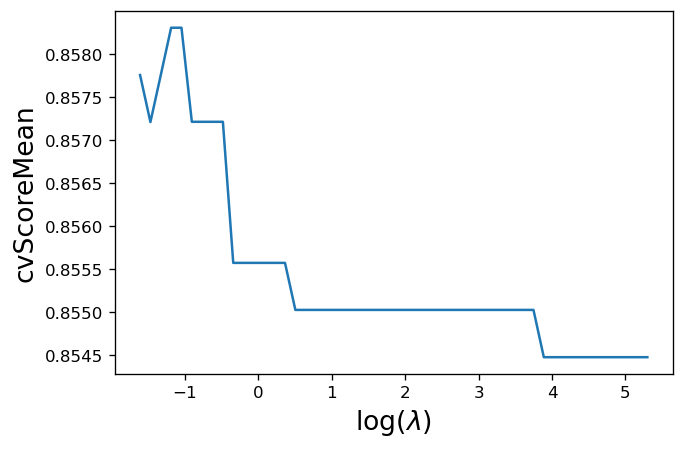

In [9]:
regularization_strength = np.exp(np.linspace(np.log(0.2),np.log(200),50))

coefs_ = []
cvScoreMean = []
for i in (regularization_strength):
    clf.set_params(C=i)
    clf.fit(Xtrain, ytrain)
    coefs_.append(clf.coef_.ravel().copy())
    cv_score = cross_val_score(clf, Xtrain, ytrain, cv=10)
    cvScoreMean.append(cv_score.mean())

fig, ax = plt.subplots(dpi = 120)
ax.plot(np.log(regularization_strength), cvScoreMean)
ax.set_xlabel(r'$\log(\lambda)$', fontsize = 16)
ax.set_ylabel(r'cvScoreMean', fontsize = 16)


In [10]:
bestI=np.argmax(cvScoreMean)
print('Best lambda:',regularization_strength[bestI])
print('Variables included:',Features.columns[coefs_[bestI]!=0])

Best lambda: 0.3052835934350467
Variables included: Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


### Question 3 (6pts)
Using the best lambda that you found, fit the L1-regularized model to all the training data and then get the the predicted probability for each item of the test set. 


Plot the ROC curve for the test set and model.

Report the area under the ROC curve. 

C:\Users\gerri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.7369602259988342

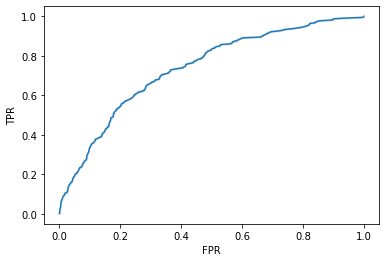

In [11]:
regularization_strength = np.exp(np.linspace(np.log(0.2),np.log(200),50))
    
# cs = l1_min_c(Xtrain, ytrain, loss='log') * np.logspace(0, 7, 16)
clf = linear_model.LogisticRegression(C = regularization_strength[bestI],penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)

clf.fit(Xtrain, ytrain)    
ytest_prob = clf.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1], pos_label=1)
ax=sns.lineplot(fpr,tpr)
ax.set(xlabel="FPR",ylabel="TPR")
auc(fpr,tpr)

In [12]:
print("The AUROC is", 0.73719339939913)

The AUROC is 0.73719339939913


### Question 4 (6pts)
Given the resulting ROC-curve, if you wanted your predictive model to have a sensitivity of more than 0.8, what is the best specificity you could achieve on the test set? 

Provide the 95% confidence interval on the specificity. Note that there are different ways of getting a valid confidence interval, including the normal approximation (central limit theorem) to the binomial distribution or bootstrap (see Labs for hints). 

In [13]:
#If we wanted a sensitivity of at least 0.8, the best specificity we could achieve is around 0.45/0.5

def confidence_interval(data):

    n = data.size
    t_quantile = t.ppf(1-0.05/2, df=n-1)
    estimated_mean = data.mean()
    # Note, np.std divides by n and not n-1
    # Force it to apply the correct formula by ussing ddof=1
    # Alternaively, you can use scipy.stats.sem to compute
    #The standard error
    estimated_se = data.std(ddof=1)/np.sqrt(data.size)
    bounds = estimated_mean + t_quantile*estimated_se*np.array([-1,1])

    
    return estimated_mean, bounds

confidence_interval(fpr)
#the bounds of the confidence interval are [0.27781947, 0.32417827]

(0.31138886030317486, array([0.28651393, 0.33626379]))

## Task 3: Deep learning (26pts + 4 Bonus points)
In this task we are looking to see if we can beat the best logistic regression model, using "deep" learning. __Only the PyTorch package is to be used in this exam. Using other Deep learning libraries is not permitted.__ 

### Question 1 (7 pts)
Build a simple linear model with 15 input units for the 15 predictor variables in the CHD data set and two output units for the two output classes (0: no CHD risk, 1: CHD risk). Use a LogSigmoid as your output non-linearity. 

Use the training data set (task 1, Question 1) to train the network:
* Z-standarize your input variables 
* Use the Cross-entropy loss as a training criterion (same as for logisitic regression) 
* Use Stochastic gradient descent optimizer with a learning rate of 0.01
* Run the optimization for 10000 iterations and record the loss for each iteration 
* Make a plot of iterations vs. loss 

In [14]:
epoch = 10000

md11 = nn.Sequential(
    nn.Linear(Xtrain.shape[1],1),
    nn.LogSigmoid(),
    nn.Linear(1, 2),
    nn.ReLU()
)

lossFunc = torch.nn.CrossEntropyLoss()
optim = torch.optim.SGD(seq_net.parameters(),lr=0.0711,momentum=0.9)


for i in range(epoch):
    
    output = seq_net(X)
    loss = lossFunc(output,Y)

    optim.zero_grad()
    loss.backward()
    optim.step()

    if (i+1)%4==0 :
        print(str((i+1))+'th loss',loss.squeeze())
    
    if i % 2 == 0:
        # plot the data to verify the learning process
        plt.cla()
        prediction = torch.max(output, 1)[1]
        predicted_y = prediction.data.numpy().squeeze()
        target_y = Y.data.numpy()
        plt.scatter(X.data.numpy()[:, 0], X.data.numpy()[:, 1], c=predicted_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(predicted_y == target_y)/200.
        plt.text(2, -8, 'Accuracy=%.2f' % accuracy, fontdict={'size': 33, 'color':  'black'})
        plt.pause(0.05)

plt.ioff()
plt.show()

NameError: name 'seq_net' is not defined

### Question 2 (8pts)
Use the trained network to make a prediction for the test set. Report an area under the ROC curve for the test data set. 

HINT: To obtain a probability from the output of the network, take the logistic function of the difference between the activities of the two output units. Remember the output unit 0 is high when the model "thinks" is class is 0 and the output unit 1 is higher when the model "thinks" the class is 1.   

In [ ]:
#some predictions done above.

### Question 3 (6pts)
Now add a hidden layer with 50 units into the network. Use a LogSigmoid non-linearity for the hidden layer. Leave all the other parameters the same as for Question 1. Again, plot the loss as a function of the iteration. 

In [ ]:
md11 = nn.Sequential(
    nn.Linear(Xtrain.shape[1],50),
    nn.LogSigmoid(),
    nn.Linear(50, 2),
    nn.ReLU()
)

### Question 4 (5pts)
As for Question 2, report the area under the ROC curve for this network on the test set. 

__Written answer:__ What do you conclude? 

### Question 4  -  Hyperparameter Tuning (4 Bonus pts)
Good Job, your employers are very impressed with your progress! Despite their satisfaction, you decide to try and improve your models further using hyperparameter optimization. You decide to test only a few hyperparameter combinations.

Create a a function to performa the hyperparameter tuning 

After your hp tuning has been completed, inspect the results  and print the best model score and parameters

## Task 4: Trees (18pts)
The code below generates and shows 4 decision trees trained on a classification problem where the feature matrix $X$ has shape $10,000 \times 10$  and the outcome has 4 classes labaled 0 through 3.  The feature names are $X_j \, j = 1 \dots 10$.  Assume each tree has been trained on a bootstrapped version of the training data and that every feature was available to the tree at every split.

In [ ]:
from IPython.display import Image
Image(filename = 'tree_0.png')
#Outcome : 2

In [ ]:
Image(filename = 'tree_1.png')
# Outcome: 1

In [ ]:
Image(filename = 'tree_2.png')
#Outcome: 0

In [ ]:
Image(filename = 'tree_3.png')
#Outcome = 0

### Question 1 (4 pts)  
How would each tree classify the following observation? 

$$\mathbf{x} = \begin{bmatrix} 
1.03\\
-0.20\\
2.00\\
-.99\\
-0.30\\
0.15\\
-.11\\
5.10\\
-0.77\\
0.90\\
\end{bmatrix}$$



Tree 0:
X5 = -0.3 is > than -0.47, and X2 = -0.2 < -0.17 so its classified as class 2

Tree 1:
X5 = -0.3 is > than -0.42, and X2 =-.2 > - 0.23 so its classified as class 1

Tree 2:
X5 = -0.3 is < -0.03 , so its classified as class 0

Tree 3:
X5 = -0.3 is < -0.24, and 0.15 > -0.32 , so its classified as class 0

### Question 2 (5pts) 
Together these trees form an ensemble.  What kind is the name of that model?  What are the advantages to using this model over decision trees?  What are the problems with this model?  How would the ensemble classify the observation in part 1?


This is a random forest model. The advantages of this are that it uses bagging to reduce the variances of the trees. By random subsampling of the feautres to create smaller trees rather than one big decision tree, we can get a more accurate model as iterations approach infinity. This essentially decorrelates the tree so that we can repeat the tree modelling infinitely with subsets, whereas decision trees rely on all of the data at once. The issues also stem from this same benefit. With more iterations, the tree can grow more complex and begin to overfit that data, again gaining variance.

The trees would vote on the class, in this case, resulting in class 0.

### Question 3 (4pts) 
Write python code that would fit the model described above if you were to be given the training data (Xtrain,ytrain).


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# impelement a random forest. Are the results obtained better or worse than those seen using a single decision tree. 
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Xtrain,ytrain)

### Question 4 (5pts) 
Suppose you trained this model and were unsatisfied with the performance.  What would be the next tree based model you would try?  Explain how this model works as if you were talking to a fellow data scientist and why it improves upon the model in part 2 (in theory). In your explanation, highlight similarities and differences between your chosen model and the model in part 2.

If I was unsatisified with the performance, I may try boosting the trees instead of bagging with a random forest. In particular, I may try using Stochastic Gradient
Boosting. This model works by using very small trees with 1 or 2 split, and passing the new basis functions forward so that the next tree can learn from the previous function without adjusting any already calculated parameters/fits. This model is particularly good when compared to random forests for data samples that are relatively small. Each tree is flexible and fast to implement. Since it is also an Additive model, it only gets more and more accurate (up to a certain extent of overfitting). Much like the first model though, it uses iterations and repetition to reduce the variance and increase accuracy.